# Assessor Data 



In [ ]:
#importing libraries + drive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import folium  #needed for interactive map
from folium.plugins import HeatMap
%matplotlib inline
sns.set()#sets seaborn theme parameters to their defaults

In [74]:
#loading data 
df = pd.read_csv("gdrive/My Drive/Team 93 Capstone Project/data/Assessor_Parcels_Data_2010 to 2020.csv")
df

,Unnamed: 0,Unnamed: 0.1,city,year,assessor_id,general_use,specific_use,net_value,zip_code,train_stops
0,0,0,LOS ANGELES,2010,2368-002-003-2010,Commercial,Commercial,455441.0,91604,1
1,1,1,LOS ANGELES,2010,4305-007-001-2010,Commercial,Store,559830.0,90035,0
2,2,2,LOS ANGELES,2010,5013-019-033-2010,Commercial,Commercial,303510.0,90043,0
3,3,3,LOS ANGELES,2010,2040-032-015-2010,Commercial,Store,800000.0,91364,0
4,4,4,LOS ANGELES,2010,2132-011-025-2010,Residential,Single Family Residence,205877.0,91335,0
...,...,...,...,...,...,...,...,...,...,...
8310935,8310935,8310935,LOS ANGELES,2020,7559-039-161-2020,Residential,Single Family Residence,281430.0,90732,0
8310936,8310936,8310936,LOS ANGELES,2020,7562-008-014-2020,Residential,Single Family Residence,106377.0,90732,0
8310937,8310937,8310937,LOS ANGELES,2020,7559-014-037-2020,Residential,Single Family Residence,418726.0,90732,0
8310938,8310938,8310938,LOS ANGELES,2020,7563-011-011-2020,Residential,Single Family Residence,805073.0,90732,0


##Cleaning Up Dataframe

In [75]:
df['train_stops'].unique()

array([1, 0, 3, 2, 4])

In [76]:
#dictionary of zip codes + their station count 

station_zip_codes = {
    '90004' : 1,
    '90006' : 0,
    '90007' : 4,
    '90012' : 2,
    '90013' : 2,
    '90015' : 1,
    '90016' : 3,
    '90017' : 1,
    '90019' : 0,
    '90020' : 1,
    '90024' : 0,
    '90026' : 0,
    '90027' : 2,
    '90028' : 2,
    '90029' : 1,
    '90034' : 1,
    '90035' : 0,
    '90036' : 0,
    '90037' : 0,
    '90038': 0,
    '90039' : 0,
    '90041' : 0,
    '90042' : 1,
    '90045' : 1,
    '90064' : 3,
    '90065' : 1,
    '90068' : 0,
    '90094' : 0,
    '90211' : 0,
    '90212' : 0,
    '90272' : 0,
    '90731' : 0,
    '90732' : 0,
    '91303' : 0,
    '91306' : 0,
    '91307' : 0,
    '91316' : 0,
    '91324' : 0,
    '91325' : 0,
    '91335' : 0,
    '91343' : 0,
    '91344' : 0,
    '91356' : 0,
    '91367' : 0,
    '91401' : 0,
    '91403' : 0,
    '91405' : 0,
    '91406' : 0,
    '91411' : 0,
    '91423' : 0,
    '91601' : 1,
    '91604' : 1,
    '91605' : 0,
    '91606' : 0,
    '91607' : 0,
    '90025' : 0,
    '90046' : 0,
    '90047' : 0,
    '90048' : 2,
    '90049' : 0,
    '90066' : 0,
    '90069' : 0,
    '90210' : 0,
    '90230' : 0,
    '90245' : 0,
    '90291' : 0,
    '90292' : 0,
    '90293' : 0,
    '90501' : 0,
    '90717' : 0,
    '91214' : 0,
    '91304' : 0,
    '91311' : 0,
    '91342' : 0,
    '91364' : 0,
    '91505' : 0
}

In [77]:
#filter dataframe to only include the list of zipcodes above

assessor_data = df[df['zip_code'].isin(list(station_zip_codes.keys()))]
assessor_data

,Unnamed: 0,Unnamed: 0.1,city,year,assessor_id,general_use,specific_use,net_value,zip_code,train_stops
0,0,0,LOS ANGELES,2010,2368-002-003-2010,Commercial,Commercial,455441.0,91604,1
1,1,1,LOS ANGELES,2010,4305-007-001-2010,Commercial,Store,559830.0,90035,0
3,3,3,LOS ANGELES,2010,2040-032-015-2010,Commercial,Store,800000.0,91364,0
4,4,4,LOS ANGELES,2010,2132-011-025-2010,Residential,Single Family Residence,205877.0,91335,0
5,5,5,LOS ANGELES,2010,2132-013-016-2010,Residential,Single Family Residence,248779.0,91335,0
...,...,...,...,...,...,...,...,...,...,...
8310935,8310935,8310935,LOS ANGELES,2020,7559-039-161-2020,Residential,Single Family Residence,281430.0,90732,0
8310936,8310936,8310936,LOS ANGELES,2020,7562-008-014-2020,Residential,Single Family Residence,106377.0,90732,0
8310937,8310937,8310937,LOS ANGELES,2020,7559-014-037-2020,Residential,Single Family Residence,418726.0,90732,0
8310938,8310938,8310938,LOS ANGELES,2020,7563-011-011-2020,Residential,Single Family Residence,805073.0,90732,0


In [78]:
assessor_data = assessor_data.reset_index()

In [79]:
assessor_data = assessor_data.drop(columns = ["index","Unnamed: 0", "Unnamed: 0.1"])

In [80]:
assessor_data

,city,year,assessor_id,general_use,specific_use,net_value,zip_code,train_stops
0,LOS ANGELES,2010,2368-002-003-2010,Commercial,Commercial,455441.0,91604,1
1,LOS ANGELES,2010,4305-007-001-2010,Commercial,Store,559830.0,90035,0
2,LOS ANGELES,2010,2040-032-015-2010,Commercial,Store,800000.0,91364,0
3,LOS ANGELES,2010,2132-011-025-2010,Residential,Single Family Residence,205877.0,91335,0
4,LOS ANGELES,2010,2132-013-016-2010,Residential,Single Family Residence,248779.0,91335,0
...,...,...,...,...,...,...,...,...
5952765,LOS ANGELES,2020,7559-039-161-2020,Residential,Single Family Residence,281430.0,90732,0
5952766,LOS ANGELES,2020,7562-008-014-2020,Residential,Single Family Residence,106377.0,90732,0
5952767,LOS ANGELES,2020,7559-014-037-2020,Residential,Single Family Residence,418726.0,90732,0
5952768,LOS ANGELES,2020,7563-011-011-2020,Residential,Single Family Residence,805073.0,90732,0


##EDA



### Whole Dataset 

First looking at the spread of whole dataset.

In [113]:
assessor_data.describe()

,net_value
count,5.931143e+06
mean,6.838588e+05
std,3.593197e+06
min,0.000000e+00
25%,1.977875e+05
50%,3.560000e+05
75%,6.320000e+05
max,8.737605e+08


In [103]:
#should look primarily at residential and commerical?
assessor_data.groupby(by=["train_stops", "general_use"])['net_value'].describe()

#Commerical, industrial, residential, and institutional

count          mean  ...         75%          max
train_stops general_use                             ...                         
0           Commercial      160134.0  2.242975e+06  ...  1530000.00  786522000.0
            Industrial       53103.0  2.219301e+06  ...  1860884.00  835387855.0
            Institutional    16060.0  1.293461e+06  ...   650346.25  141518481.0
            Residential    4366685.0  5.670859e+05  ...   592000.00  372167588.0
1           Commercial       61392.0  2.697778e+06  ...  1285620.00  502747279.0
            Industrial       13177.0  1.834075e+06  ...  1520173.00  143692829.0
            Institutional     4353.0  1.119127e+06  ...   619284.00  117740000.0
            Residential     782008.0  5.828307e+05  ...   638700.00  438405496.0
2           Commercial       26651.0  3.781548e+06  ...  2189110.50  546883675.0
            Industrial        5528.0  2.165449e+06  ...  1874244.25  227727230.0
            Institutional     1817.0  3.480781e+06  ...   799885.00  873760476.0
            Residential     197174.0  7.944251e+05  ...   799989.75  233232450.0
3           Commercial       11360.0  2.108596e+06  ...  1256854.00  240069423.0
            Industrial        4427.0  2.812349e+06  ...  1427559.50  448058019.0
            Institutional      939.0  5.812910e+05  ...   378934.50   26343384.0
            Residential     182691.0  4.839931e+05  ...   615400.00  115417773.0
4           Commercial        5088.0  1.446524e+06  ...   887156.75  203920958.0
            Industrial        4730.0  8.993087e+05  ...  1034785.00   29651400.0
            Institutional      833.0  1.721859e+06  ...   274575.00  563204485.0
            Residential      32993.0  5.274522e+05  ...   430174.00  489432023.0

[20 rows x 8 columns]

In [60]:
assessor_data.dtypes

city             object
year              int64
assessor_id      object
general_use      object
specific_use     object
net_value       float64
zip_code          int64
train_stops       int64
dtype: object

In [82]:
assessor_data["year"] = assessor_data["year"].astype("str")
assessor_data["zip_code"] = assessor_data["zip_code"].astype("str")
assessor_data["train_stops"] = assessor_data["train_stops"].astype("category")
assessor_data["net_value"] = assessor_data["net_value"].astype("int")

Creating a subsest of the df that looks only at commerical, industrial, residential, and institutional properties.

In [83]:
properties = ['Commercial', 'Industrial', 'Residential', 'Institutional']
assessor_data = assessor_data[assessor_data['general_use'].isin(properties)]
assessor_data

,city,year,assessor_id,general_use,specific_use,net_value,zip_code,train_stops
0,LOS ANGELES,2010,2368-002-003-2010,Commercial,Commercial,455441,91604,1
1,LOS ANGELES,2010,4305-007-001-2010,Commercial,Store,559830,90035,0
2,LOS ANGELES,2010,2040-032-015-2010,Commercial,Store,800000,91364,0
3,LOS ANGELES,2010,2132-011-025-2010,Residential,Single Family Residence,205877,91335,0
4,LOS ANGELES,2010,2132-013-016-2010,Residential,Single Family Residence,248779,91335,0
...,...,...,...,...,...,...,...,...
5952765,LOS ANGELES,2020,7559-039-161-2020,Residential,Single Family Residence,281430,90732,0
5952766,LOS ANGELES,2020,7562-008-014-2020,Residential,Single Family Residence,106377,90732,0
5952767,LOS ANGELES,2020,7559-014-037-2020,Residential,Single Family Residence,418726,90732,0
5952768,LOS ANGELES,2020,7563-011-011-2020,Residential,Single Family Residence,805073,90732,0


### Group by train stops 

Using the groupby function to see the spread by train stop status 


In [84]:
assessor_data.groupby("train_stops").describe()

net_value                ...                        
                 count          mean  ...        75%          max
train_stops                           ...                        
0            4595982.0  6.471058e+05  ...  614237.25  835387855.0
1             860930.0  7.555079e+05  ...  667507.00  502747279.0
2             231170.0  1.192703e+06  ...  896000.00  873760476.0
3             199417.0  6.286873e+05  ...  645436.00  448058019.0
4              43644.0  6.976946e+05  ...  523603.00  563204485.0

[5 rows x 8 columns]

Visualizing with a boxplot (removing outliers)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


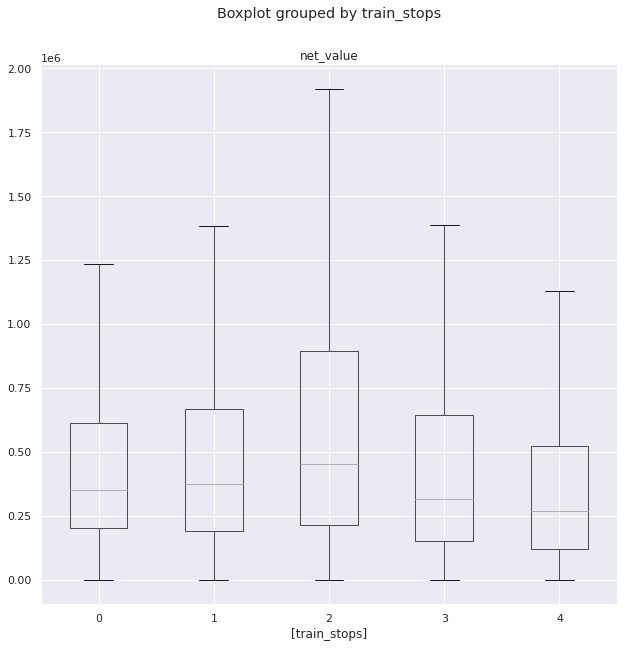

In [95]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)

assessor_data.boxplot(column = "net_value", by=["train_stops"], ax=ax, showfliers=False)

Zip codes with 1 and 2 train stops have a higher mean and median property value than zip codes with 0, but they also have a wider spread. What if we also group by general use?

###Group by property types and train stops

In [85]:
assessor_data.groupby(["train_stops", "general_use"]).describe()

net_value                ...                         
                               count          mean  ...         75%          max
train_stops general_use                             ...                         
0           Commercial      160134.0  2.242975e+06  ...  1530000.00  786522000.0
            Industrial       53103.0  2.219301e+06  ...  1860884.00  835387855.0
            Institutional    16060.0  1.293461e+06  ...   650346.25  141518481.0
            Residential    4366685.0  5.670859e+05  ...   592000.00  372167588.0
1           Commercial       61392.0  2.697778e+06  ...  1285620.00  502747279.0
            Industrial       13177.0  1.834075e+06  ...  1520173.00  143692829.0
            Institutional     4353.0  1.119127e+06  ...   619284.00  117740000.0
            Residential     782008.0  5.828307e+05  ...   638700.00  438405496.0
2           Commercial       26651.0  3.781548e+06  ...  2189110.50  546883675.0
            Industrial        5528.0  2.165449e+06  ...  1874244.25  227727230.0
            Institutional     1817.0  3.480781e+06  ...   799885.00  873760476.0
            Residential     197174.0  7.944251e+05  ...   799989.75  233232450.0
3           Commercial       11360.0  2.108596e+06  ...  1256854.00  240069423.0
            Industrial        4427.0  2.812349e+06  ...  1427559.50  448058019.0
            Institutional      939.0  5.812910e+05  ...   378934.50   26343384.0
            Residential     182691.0  4.839931e+05  ...   615400.00  115417773.0
4           Commercial        5088.0  1.446524e+06  ...   887156.75  203920958.0
            Industrial        4730.0  8.993087e+05  ...  1034785.00   29651400.0
            Institutional      833.0  1.721859e+06  ...   274575.00  563204485.0
            Residential      32993.0  5.274522e+05  ...   430174.00  489432023.0

[20 rows x 8 columns]

Lots of numbers, but seems like a similar trend. Visualizing with a  boxplot that represents the distribution of property values from 2010 to 2020 by train_stop status. 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


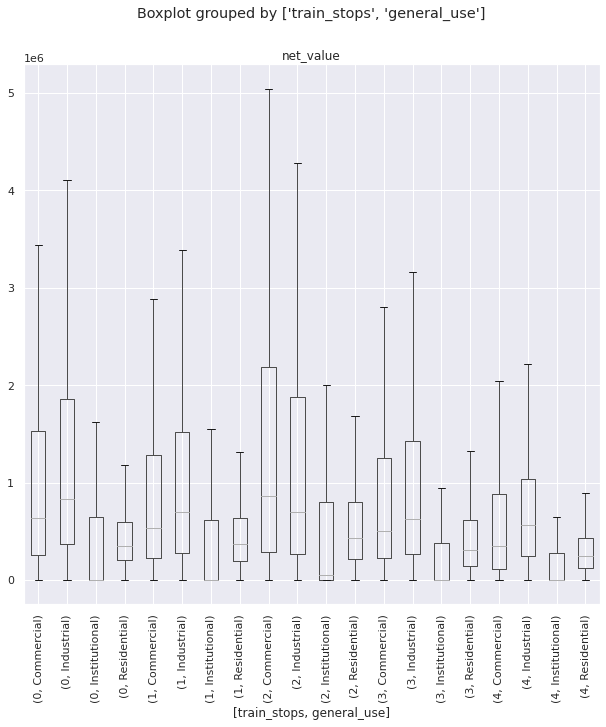

In [102]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
assessor_data.boxplot(column = "net_value", by=["train_stops", "general_use"], ax=ax, rot=90, showfliers=False)

###Group by train stops and year 

Let's see how if this trend is the same year to year or if this is a case of the simpson's paradox.

In [ ]:
#assessor_data = sns.load_dataset("assessor_data")
#sns.FacetGrid(assessor_data, col="train_stops", row="net_value")

In [93]:
assessor_data.groupby(by=["year", "train_stops"]).describe()


net_value                ...                         
                     count          mean  ...         75%          max
year train_stops                          ...                         
2010 0            414728.0  5.066497e+05  ...   488904.50  804932928.0
     1             76716.0  5.667256e+05  ...   519494.25  308100000.0
     2             20286.0  8.698168e+05  ...   710905.25  455334577.0
     3             18057.0  4.894958e+05  ...   501614.00  376034726.0
     4              3992.0  4.834206e+05  ...   416798.00   67433033.0
2011 0            415957.0  5.159691e+05  ...   497500.00  774711292.0
     1             77312.0  5.742319e+05  ...   525460.25  308100000.0
     2             20771.0  8.660406e+05  ...   729761.50  458763245.0
     3             18154.0  4.968023e+05  ...   513000.00  378866266.0
     4              3990.0  4.972439e+05  ...   404653.00   67940803.0
2012 0            416683.0  5.275271e+05  ...   502264.50  835387855.0
     1             77418.0  5.902995e+05  ...   537023.00  308100000.0
     2             20770.0  9.103295e+05  ...   750000.00  467938509.0
     3             18169.0  5.116963e+05  ...   521218.00  386443590.0
     4              3985.0  5.018868e+05  ...   408000.00   69299618.0
2013 0            416948.0  5.558024e+05  ...   526619.00  807305995.0
     1             77735.0  6.282073e+05  ...   567108.50  343000000.0
     2             21010.0  9.705432e+05  ...   775491.00  477297278.0
     3             18168.0  5.324658e+05  ...   542424.50  394172461.0
     4              3976.0  5.825333e+05  ...   421393.25  203920958.0
2014 0            417226.0  5.887579e+05  ...   563038.50  832215728.0
     1             77757.0  6.710703e+05  ...   606182.00  432785605.0
     2             21143.0  1.018385e+06  ...   818317.00  479464207.0
     3             18161.0  5.619654e+05  ...   575000.00  395962003.0
     4              3968.0  5.593435e+05  ...   454693.00   92588100.0
2015 0            417445.0  6.276851e+05  ...   597647.00  775146653.0
     1             77968.0  7.292724e+05  ...   646609.50  466004821.0
     2             21215.0  1.112770e+06  ...   875151.50  498040231.0
     3             18139.0  5.993561e+05  ...   619663.50  403873323.0
     4              3965.0  6.748601e+05  ...   492467.00  461780806.0
2016 0            418072.0  6.677415e+05  ...   631674.00  736598697.0
     1             78556.0  7.764438e+05  ...   690113.25  468678945.0
     2             21200.0  1.217677e+06  ...   929439.25  505490491.0
     3             18138.0  6.350195e+05  ...   652979.00  413936355.0
     4              3960.0  7.194830e+05  ...   540194.50  467934386.0
2017 0            418843.0  7.110215e+05  ...   669887.50  730836944.0
     1             78559.0  8.270016e+05  ...   735243.00  473435080.0
     2             21193.0  1.317752e+06  ...   998234.00  515426282.0
     3             18135.0  6.846924e+05  ...   698354.50  422215081.0
     4              3950.0  7.774555e+05  ...   585081.00  476609477.0
2018 0            419777.0  7.553560e+05  ...   710000.00  727470270.0
     1             79174.0  8.942321e+05  ...   783748.00  480296303.0
     2             21113.0  1.493132e+06  ...  1059409.00  716489447.0
     3             18124.0  7.416372e+05  ...   756533.25  430659381.0
     4              3963.0  9.659971e+05  ...   630399.50  563204485.0
2019 0            420235.0  8.027008e+05  ...   751000.00  730123507.0
     1             79840.0  9.752637e+05  ...   831161.00  487905635.0
     2             21223.0  1.566196e+06  ...  1125836.50  536340615.0
     3             18110.0  7.952510e+05  ...   811152.00  439272568.0
     4              3950.0  9.505107e+05  ...   731653.00  419066678.0
2020 0            420068.0  8.540232e+05  ...   793000.00  786522000.0
     1             79895.0  1.055960e+06  ...   880521.00  502747279.0
     2             21246.0  1.748094e+06  ...  1199909.50  873760476.0
     3             18062.0  8.684770e+05 

This is a lot of numbers, but we seem to be seeing the same trend - 1 + 2 train stops have higher mean property values than zip codes with no train stops. We'll use a line plot to try to visual this.

In [108]:
df= assessor_data.groupby(by=["year", "train_stops"]).mean().reset_index()

In [109]:
df

,year,train_stops,net_value
0,2010,0,5.066497e+05
1,2010,1,5.667256e+05
2,2010,2,8.698168e+05
3,2010,3,4.894958e+05
4,2010,4,4.834206e+05
5,2011,0,5.159691e+05
6,2011,1,5.742319e+05
7,2011,2,8.660406e+05
8,2011,3,4.968023e+05
9,2011,4,4.972439e+05


Text(0, 0.5, 'Average Net Property Value')

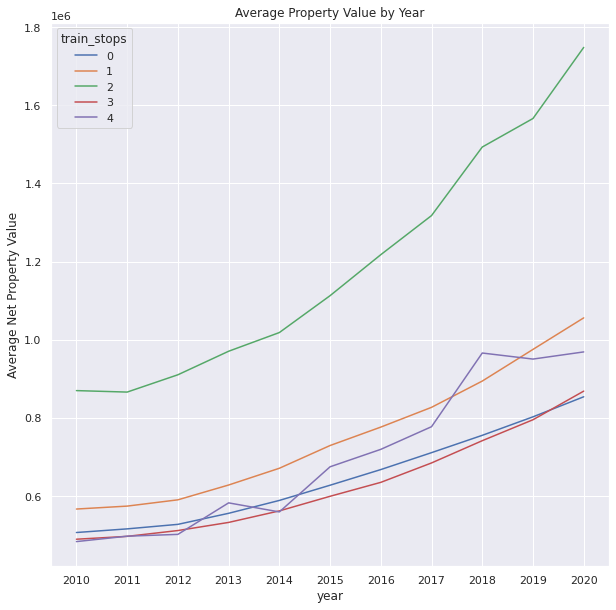

In [114]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x=df["year"], y=df["net_value"], hue=df["train_stops"], ax=ax)
plt.title("Average Property Value by Year")
plt.ylabel("Average Net Property Value")

This relationship is even more clear visually. We see that zip_codes with 

###Commercial Properties 

In [ ]:
#creating a subset df w/ commercial properties only 
commercial= df[df["general_use"]=="Commercial"]
commercial

,Unnamed: 0,Unnamed: 0.1,city,year,assessor_id,general_use,specific_use,net_value,zip_code,train_stops
0,0,0,LOS ANGELES,2010,2368-002-003-2010,Commercial,Commercial,455441.0,91604,1
1,1,1,LOS ANGELES,2010,4305-007-001-2010,Commercial,Store,559830.0,90035,0
2,2,2,LOS ANGELES,2010,5013-019-033-2010,Commercial,Commercial,303510.0,90043,0
3,3,3,LOS ANGELES,2010,2040-032-015-2010,Commercial,Store,800000.0,91364,0
338,338,338,LOS ANGELES,2010,2134-001-015-2010,Commercial,Store,130655.0,91306,0
...,...,...,...,...,...,...,...,...,...,...
8308250,8308250,8308250,LOS ANGELES,2020,7562-017-017-2020,Commercial,"Shopping Center (Neighborhood, Community)",2695429.0,90732,0
8308847,8308847,8308847,LOS ANGELES,2020,7562-005-013-2020,Commercial,Store,499154.0,90732,0
8309641,8309641,8309641,LOS ANGELES,2020,7563-016-018-2020,Commercial,"Bank, Savings and Loan",4713283.0,90732,0
8309846,8309846,8309846,LOS ANGELES,2020,7563-016-016-2020,Commercial,"Shopping Center (Neighborhood, Community)",3772820.0,90732,0


Cleaning up some features in the data 

In [ ]:
commercial = commercial.drop(columns = ["Unnamed: 0", "Unnamed: 0.1"])

In [ ]:
commercial["year"] = pd.to_datetime(df["year"], format='%Y')
commercial["zip_code"] = commercial["zip_code"].astype("str")
commercial["train_stops"] = commercial["train_stops"].astype("category")
commercial["net_value"] = commercial["net_value"].astype("int")

In [ ]:
commercial.dtypes

city                    object
year            datetime64[ns]
assessor_id             object
general_use             object
specific_use            object
net_value                int64
zip_code                object
train_stops           category
dtype: object

In [ ]:
commercial.head()

,city,year,assessor_id,general_use,specific_use,net_value,zip_code,train_stops
0,LOS ANGELES,2010-01-01,2368-002-003-2010,Commercial,Commercial,455441,91604,1
1,LOS ANGELES,2010-01-01,4305-007-001-2010,Commercial,Store,559830,90035,0
2,LOS ANGELES,2010-01-01,5013-019-033-2010,Commercial,Commercial,303510,90043,0
3,LOS ANGELES,2010-01-01,2040-032-015-2010,Commercial,Store,800000,91364,0
338,LOS ANGELES,2010-01-01,2134-001-015-2010,Commercial,Store,130655,91306,0


I'll start by describing the data - its spread, count, etc. 

In [ ]:
#how to supress exponential notion in pandas?
commercial.describe()

,net_value
count,3.853630e+05
mean,2.346043e+06
std,1.464882e+07
min,0.000000e+00
25%,1.945505e+05
50%,4.875170e+05
75%,1.264932e+06
max,1.056504e+09


**Univariate analysis** - I'll first plot bar plots of the types of commercial properties in LA, then I'll plot boxplots of commercial properties by train stop status. 

In [ ]:
#Exploring types of commercial properties in Los Angeles 
counts = commercial["specific_use"].value_counts().to_frame()
counts

,specific_use
Store,97567
Store Combination,65189
Office Building,48114
Parking Lot (Commercial Use Property),43299
"Auto, Recreation Equipment, Construction Equipment Sales and Service",35170
"Restaurant, Cocktail Lounge",22626
Commercial,16704
Professional Building,13272
"Shopping Center (Neighborhood, Community)",9544
Hotel and Motel,9031


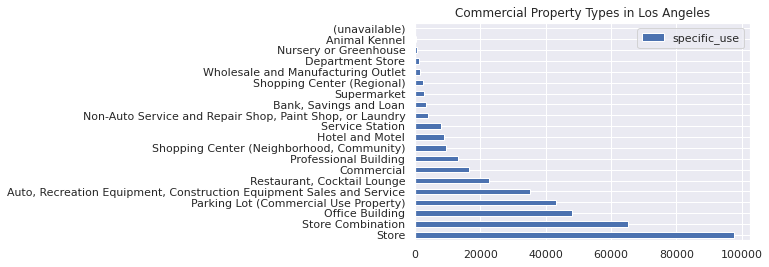

In [ ]:
counts.plot(kind="barh")
plt.title("Commercial Property Types in Los Angeles")
plt.show()

Let's first look at the distribution of commercial values (without outliers) grouping by train stops. 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


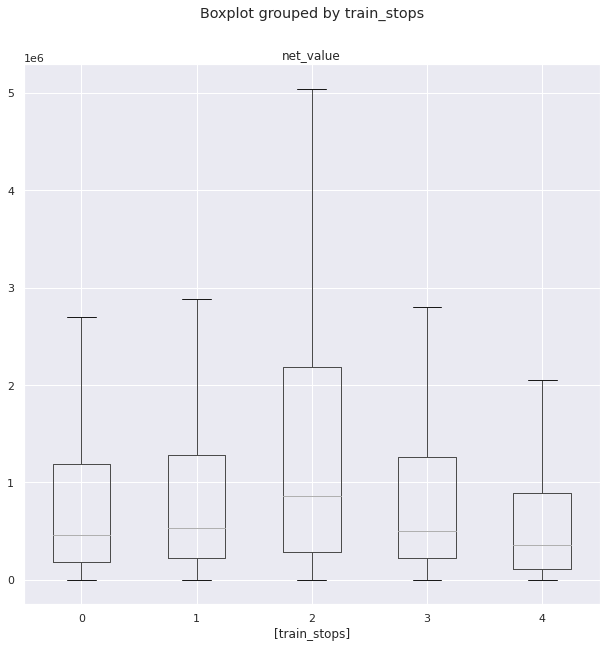

In [59]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)

commercial.boxplot(column = "net_value", by=["train_stops"], ax=ax, showfliers=False)

first - groupby trainstops + mean() / median()
second - 